In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('housing data.csv', sep=',', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                                                       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Estudi del dataframe

#### Informació d'atributs:

1. **CRIM**: Taxa de delinqüència per càpita per municipis.
2. **ZN**: Proporció de sòl residencial zonificat per a solars superiors 25.000 peus quadrats.
3. **INDUS**: Proporció d'hectàrees comercials no minoristes per ciutat.
4. **CHAS**: Variable dummy de Charles River (= 1 si limita amb el riu; 0 en cas contrari).
5. **NOX**: Concentració d'òxids nítrics (parts per 10 milions).
6. **RM**: Nombre mitjà d'habitacions per habitatge.
7. **AGE**: Proporció de les unitats ocupades pel propietari construïdes abans de 1940.
8. **DIS**: Distàncies ponderades fins a cinc centres d'ocupació de Boston.
9. **RAD**: Índex d'accessibilitat a les carreteres radials.
10. **TAX**: Valor total de l'impost sobre la propietat per 10.000$.
11. **PTRATIO**: Ràtio alumnes-professor per municipis.
12. **B**: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per municipi.
13. **LSTAT**: % d'estatus inferior de la població.
14. **MEDV**: Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars.
     
***Opinió personal: l'atribut 12 és indignant.***

In [2]:
# Informació sobre el nombre de columnes, de files i el seu tipus de dada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


El dataframe consta de 14 columnes i 506 files. Totes les dades són de tipus float menys les que pertanyen a CHAS i a RAD, que són de tipus int.

In [3]:
# Descripció estadística del dataframe

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Comprovem que no hi hagi valors nulls (no cal fer isna(), ja que a pandas isnull() i isna() és equivalent)

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No hi ha cap valor null.

In [5]:
# Comprovem si hi ha duplicats

df[df.duplicated]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


No hi ha duplicats.

In [6]:
# Mirem el nombre de valors únics en cada columna per a trobar columnes susceptibles de ser transformades en dummies.

df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Com podem veure, CHAS té 2 valors únics (és una columna dummy) i RAD en té 9 (la podem transformar en dummy).

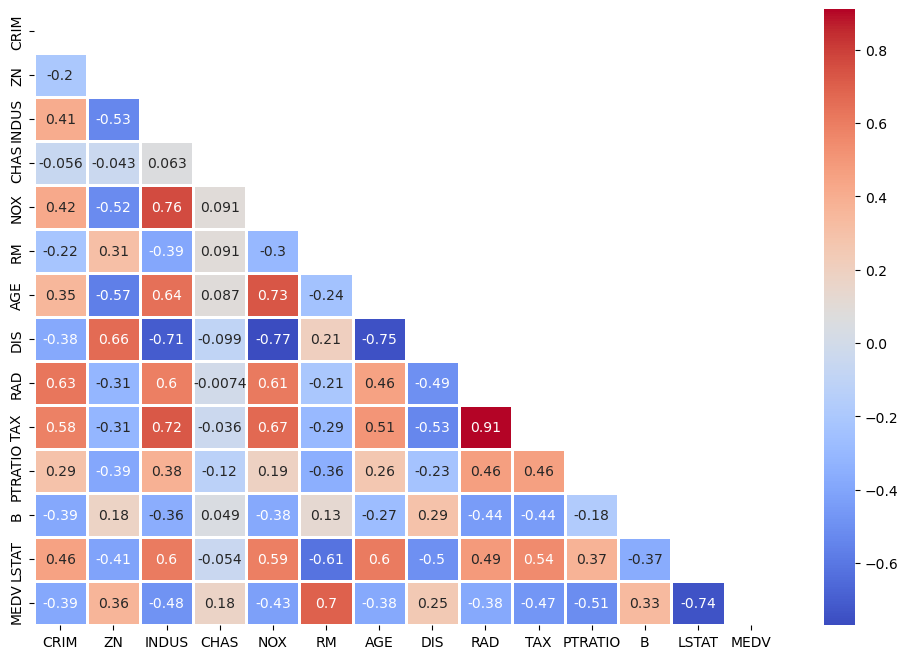

In [7]:
# Fem un mapa de calor per veure les correlacions entre variables

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', linewidths=1, linecolor='white', annot=True)
plt.show()

El valor que volem predir (target) és el MEDV (preu). 

Com podem veure, les variables que tenen una correlació forta amb el preu amb molta diferència són LSTAT (% d'estatus inferior de la població), ja que com més pobre sigui un barri menys valdrà la vivenda (correlació negativa) i RM (Nombre mitjà d'habitacions per habitatge), ja que normalment com més habitacions té una vivenda més cara és (correlació positiva). 

INDUS, TAX i PTRATIO tenen una correlació moderada amb MEDV, i la resta tenen una correlació dèbil o directament podriem considerar que no tenen correlació.

A destacar la correlació positiva quasi perfecta entre TAX i RAD.

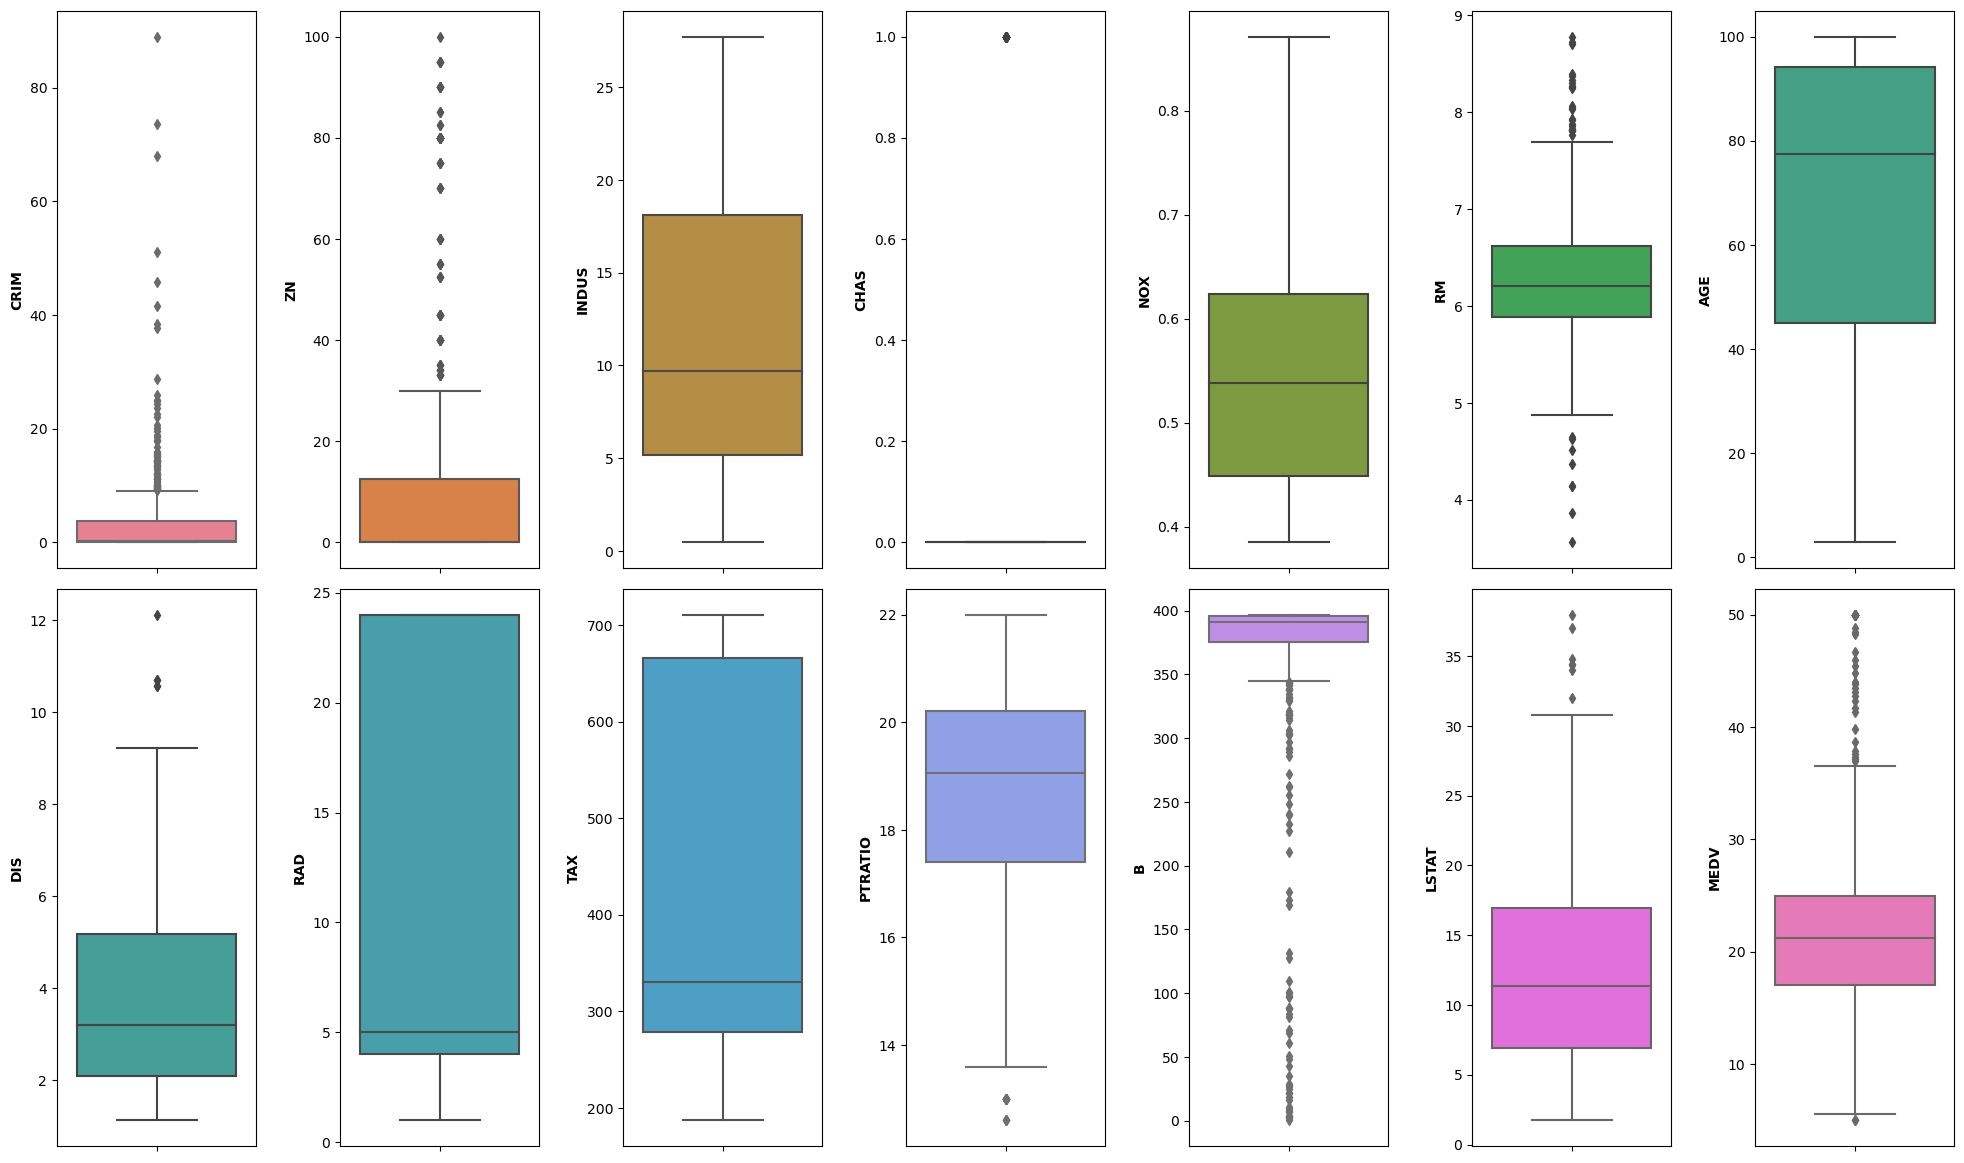

In [8]:
# Fem un boxplot de cada variable per veure els outliers que tenen

colors = sns.color_palette("husl", len(df.columns))

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 12))
count = 0
axs = axs.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(y=column, data=df, ax=axs[count], color=colors[i])
    axs[count].set_ylabel(column, fontweight='bold')
    count += 1

plt.tight_layout(pad=2, w_pad=2, h_pad=1)
plt.show()

Les variables amb outliers són: 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO' ,'B' ,'LSTAT' i 'MEDV'. 'MEDV' és la variable target i 
en models de regressió lineal, normalment no es normalitza ni s'estandaritza la variable target, ja que els coeficients del model resultant s'interpreten en relació amb l'escala original de la variable target. A la resta de variables aplicarem RobustScaler.

Les variables sense outliers són: 'INDUS', 'NOX', 'AGE' i 'TAX'. A aquestes aplicarem MinMaxScaler. 

In [9]:
# Apliquem el test de Shapiro a cada variable per veure si tenen una distribució gaussiana

from scipy.stats import shapiro

for column in df.columns:
    stat, p_value = shapiro(df[column])
    is_normal = "Normal" if p_value > 0.05 else "No normal"
    print(f"{column}: {is_normal}")

CRIM: No normal
ZN: No normal
INDUS: No normal
CHAS: No normal
NOX: No normal
RM: No normal
AGE: No normal
DIS: No normal
RAD: No normal
TAX: No normal
PTRATIO: No normal
B: No normal
LSTAT: No normal
MEDV: No normal


Com podem veure, cap variable té una distribució normal, per tant no podrem aplicar la standarització tret que tinguin outliers.

In [10]:
# Fem copia abans del preprocessat per no modificar el dataframe original

df_copy = df.copy()

### Preprocessat

Com hem comentat, procedirem a transformar en dummy la variable RAD, ja que només té 9 valors únics.

In [11]:
df_copy = pd.get_dummies(df_copy, columns=["RAD"])
df_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


Procedim ara a normalitzar i standarditzar les variables segons si tenen o no outliers.

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler

columnsNorm = ['INDUS', 'NOX', 'AGE', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(df_copy[columnsNorm])
df_copy[columnsNorm] = scaler.transform(df_copy[columnsNorm])

columnsRobust = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO' ,'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(df_copy[columnsRobust])
df_copy[columnsRobust] = scaler.transform(df_copy[columnsRobust])

df_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,...,22.4,1,0,0,0,0,0,0,0,0
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,...,20.6,1,0,0,0,0,0,0,0,0
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,...,23.9,1,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,...,22.0,1,0,0,0,0,0,0,0,0


# Exercici 1
### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

#### Train/Test

Procedirem a dividir la data en Train/Test. Utilitzarem un 75% de les dades per Train i un 25% per Test.

In [13]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(['MEDV'], axis=1)
y = df_copy['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

print('Dimensions del conjunt d\'entrenament:')
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print('Dimensions del conjunt de test:')
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Dimensions del conjunt d'entrenament:
X_train: (379, 21)
y_train: (379,)
Dimensions del conjunt de test:
X_test: (127, 21)
y_test: (127,)


#### Entrenament del model de Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Predicció amb Linear Regression:', y_pred_lr[:5])

Predicció amb Linear Regression: [35.47907334 23.86649482 12.58852783 32.60367483 30.11479168]


#### Entrenament del model de Support Vector Regression

In [15]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print('Predicció amb Support Vector Regression:', y_pred_svr[:5])

Predicció amb Support Vector Regression: [28.21514957 19.2056893  17.70277935 30.34062465 29.80762307]


# Exercici 2
### Compara’ls en base al MSE i al R2.

#### MSE

In [16]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

#### R2

In [17]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
r2_svr = r2_score(y_test, y_pred_svr)

#### Fem un dataframe per comparar

In [18]:
metrics = pd.DataFrame(data=[['Linear Regression', r2_lr, mse_lr], 
                             ['Support Vector Regression', r2_svr, mse_svr]],
                       columns=['Model', 'R2', 'MSE'])

metrics = metrics.round(decimals=2)
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.53,22.12
1,Support Vector Regression,0.64,16.75


Veiem que tant amb la mètrica R2 com amb la MSE, el model de SVM obté millor rendiment que el de LR.

En general, es cerca un valor de R2 proper a 1 i un valor de MSE proper a 0 per a un millor rendiment del model.

# Exercici 3
### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

#### Linear Regression

In [19]:
# Mirem els hiperparàmetres

print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [20]:
# Com que el dataframe no és gran, utilitzarem GridSearchCV per a obtenir els millors valors dels hiperparàmetres

from sklearn.model_selection import GridSearchCV

# Creem diccionari amb els hiperparàmetres

param_lr = {'copy_X': [True, False],
            'fit_intercept': [True, False],
            'n_jobs': [-1, None, 1],
            'positive': [True, False]}

# Busquem els millors valors

grid_lr = GridSearchCV(estimator=lr, param_grid=param_lr)

grid_lr.fit(X_train, y_train)

print("Millors hiperparàmetres:", grid_lr.best_params_)

Millors hiperparàmetres: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}


Ens diu que hem de canviar els valors de 'fit_intercept' i 'n_jobs'.

In [21]:
lr_best = LinearRegression(fit_intercept=False, n_jobs=-1).fit(X_train, y_train)

y_pred_lr_best = lr_best.predict(X_test)


# R2 millorat

r2_lr_best = r2_score(y_test, y_pred_lr_best)
print('R2 millorat = ', round(r2_lr_best, 2))

# MSE millorat

mse_lr_best = mean_squared_error(y_test, y_pred_lr_best)
print('MSE millorat = ', round(mse_lr_best, 2))

R2 millorat =  0.53
MSE millorat =  22.12


#### Support Vector Regression

In [22]:
# Mirem els hiperparàmetres

print(svr.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [23]:
param_svr = {'kernel': ('rbf', 'linear', 'rbf', 'sigmoid'),
             'degree': [3, 6, 9], 
             'gamma': ('scale', 'auto'),
             'coef0': [0.01, 0.5, 1],  
             'C': [1, 5, 10],
             'epsilon': [0.1, 0.2, 0.5]}
                
# Busquem els millors valors

grid_svr = GridSearchCV(estimator=svr, param_grid=param_svr)

grid_svr.fit(X_train, y_train)

print("Millors hiperparàmetres:", grid_svr.best_params_)

Millors hiperparàmetres: {'C': 10, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}


Ens diu que hem de canviar els valors de 'C', 'coef0', 'epsilon' i 'gamma'.

In [24]:
svr_best = SVR(C=10, coef0=0.01, degree=3, epsilon=0.5, gamma='auto', kernel='rbf').fit(X_train, y_train)

y_pred_svr_best = svr_best.predict(X_test)

# R2 millorat

r2_svr_best = r2_score(y_test, y_pred_svr_best)
print('R2 millorat = ', round(r2_svr_best, 2))

# MSE millorat

mse_svr_best = mean_squared_error(y_test, y_pred_svr_best)
print('MSE millorat = ', round(mse_svr_best, 2))

R2 millorat =  0.7
MSE millorat =  13.93


Fem un dataframe per comparar.

In [25]:
best_metrics = pd.DataFrame(data=[['Best Linear Regression', r2_lr_best, mse_lr_best], 
                                  ['Best Support Vector Regression', r2_svr_best, mse_svr_best]],
                            columns=['Model', 'R2', 'MSE'])

best_metrics = best_metrics.round(decimals=2)
best_metrics.head()

,Model,R2,MSE
0,Best Linear Regression,0.53,22.12
1,Best Support Vector Regression,0.70,13.93


Fusionem els dos dataframes.

In [26]:
merged_metrics = pd.concat([metrics, best_metrics], ignore_index=True)

merged_metrics.head()

,Model,R2,MSE
0,Linear Regression,0.53,22.12
1,Support Vector Regression,0.64,16.75
2,Best Linear Regression,0.53,22.12
3,Best Support Vector Regression,0.70,13.93


Després de millorar els hiperparàmetres podem veure que el model de Linear Regression s'ha quedat exactament igual. En canvi, el de SVR ha millorat lleugerament tant l'R2 (de 0.64 a 0.70) com també l'MSE (de 16.75 a 13.93).

# Exercici 4
### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

#### Validació interna del model Linear Regression

In [27]:
from sklearn.model_selection import cross_val_score

cv_lr_r2 = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cv_lr_mse = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

promig_cv_lr_r2 = cv_lr_r2.mean()
promig_cv_lr_mse = cv_lr_mse.mean()

print('Promig del R2 fent CV al model Linear Regression', round(promig_cv_lr_r2, 2))
print('Promig del MSE fent CV al model Linear Regression', round(-promig_cv_lr_mse, 2))

Promig del R2 fent CV al model Linear Regression 0.33
Promig del MSE fent CV al model Linear Regression 37.89


#### Validació interna del model Support Vector Regression

In [28]:
cv_svr_r2 = cross_val_score(SVR(), X, y, cv=5, scoring='r2')
cv_svr_mse = cross_val_score(SVR(), X, y, cv=5, scoring='neg_mean_squared_error')

promig_cv_svr_r2 = cv_svr_r2.mean()
promig_cv_svr_mse = cv_svr_mse.mean()

print('Promig del R2 fent CV al model SVR', round(promig_cv_svr_r2, 2))
print('Promig del MSE fent CV al model SVR', round(-promig_cv_svr_mse, 2))

Promig del R2 fent CV al model SVR 0.22
Promig del MSE fent CV al model SVR 45.75


In [29]:
CV_metrics = pd.DataFrame(data=[['Linear Regression', r2_lr, mse_lr, promig_cv_lr_r2, -promig_cv_lr_mse],
                                ['Support Vector Machines', r2_svr, mse_svr, promig_cv_svr_r2, -promig_cv_svr_mse]],
                          columns=['Model', 'R2', 'MSE', 'R2 with CV', 'MSE with CV'])

CV_metrics = CV_metrics.round(decimals=2)
CV_metrics.head()

,Model,R2,MSE,R2 with CV,MSE with CV
0,Linear Regression,0.53,22.12,0.33,37.89
1,Support Vector Machines,0.64,16.75,0.22,45.75


Com podem veure, la cross-validation ha empitjorat els resultats en tots els casos.

# Exercici 5
### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [30]:
# Train/Test sense la variable RM

X_no_rm = df_copy.drop(['MEDV','RM'], axis=1)
y_no_rm = df_copy['MEDV']

X_train_no_rm, X_test_no_rm, y_train_no_rm, y_test_no_rm = train_test_split(X_no_rm, y_no_rm, test_size=0.25, random_state=38)

print('Dimensions del conjunt d\'entrenament:')
print("X_train:", X_train_no_rm.shape)
print("y_train:", y_train_no_rm.shape)
print('Dimensions del conjunt de test:')
print("X_test:", X_test_no_rm.shape)
print("y_test:", y_test_no_rm.shape)

Dimensions del conjunt d'entrenament:
X_train: (379, 20)
y_train: (379,)
Dimensions del conjunt de test:
X_test: (127, 20)
y_test: (127,)


In [31]:
# Entrenament del model LR

lr_no_rm = LinearRegression()
lr_no_rm.fit(X_train_no_rm, y_train_no_rm)
y_pred_lr_no_rm = lr_no_rm.predict(X_test_no_rm)

print('Predicció amb Linear Regression:', y_pred_lr_no_rm[:5])

Predicció amb Linear Regression: [16.3907119  19.63017623 22.99620586 31.71110815 19.59912746]


In [32]:
# Entrenament del model SVR

svr_no_rm = SVR()
svr_no_rm.fit(X_train_no_rm, y_train_no_rm)
y_pred_svr_no_rm = svr_no_rm.predict(X_test_no_rm)

print('Predicció amb Support Vector Regression:', y_pred_svr_no_rm[:5])

Predicció amb Support Vector Regression: [18.50995082 19.60799217 22.21023073 25.80312743 18.7757159 ]


In [33]:
# MSE

mse_lr_no_rm = mean_squared_error(y_test_no_rm, y_pred_lr_no_rm)
mse_svr_no_rm = mean_squared_error(y_test_no_rm, y_pred_svr_no_rm)

In [34]:
# R2

r2_lr_no_rm = r2_score(y_test_no_rm, y_pred_lr_no_rm)
r2_svr_no_rm = r2_score(y_test_no_rm, y_pred_svr_no_rm)

In [35]:
# Fem un dataframe amb els resultats

metrics_no_rm = pd.DataFrame(data=[['Linear Regression_no_rm', r2_lr_no_rm, mse_lr_no_rm], 
                             ['Support Vector Regression_no_rm', r2_svr_no_rm, mse_svr_no_rm]],
                             columns=['Model', 'R2', 'MSE'])

metrics_no_rm = metrics_no_rm.round(decimals=2)
metrics_no_rm.head()

,Model,R2,MSE
0,Linear Regression_no_rm,0.64,29.59
1,Support Vector Regression_no_rm,0.40,50.14


In [36]:
# El fusionem amb el dataframe dels resultats amb la variable RM

merged_metrics_no_rm = pd.concat([metrics, metrics_no_rm], ignore_index=True)

merged_metrics_no_rm.head()

,Model,R2,MSE
0,Linear Regression,0.53,22.12
1,Support Vector Regression,0.64,16.75
2,Linear Regression_no_rm,0.64,29.59
3,Support Vector Regression_no_rm,0.40,50.14


Al treure la variable RM, una variable amb alta correlació amb el target, ens trobem amb resultats oposats en el model LR (millora R2 però empitjora MSE) i amb resultats molt pitjors en el model SVR (l'R2 passa de 0.64 a 0.40 i l'MSE de 16.75 a 50.14).